## Imports

In [1]:
from collections import namedtuple, defaultdict
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib as mpl
mpl.rcParams["figure.dpi"] = 300



Result = namedtuple('Result', ['partisans', "sims"])
Sim = namedtuple("Sim", ["asymptotic", "non_partisans_mean"])

In [2]:
PARTISAN_BIAS = 0.3
TRUE_BIAS = 0.6

## m = 3

In [3]:
#   1000 run/f but taking mean per sim 
#  import json
# Dwell = namedtuple("Dwell", ["n", "mean", "stdev"])
# # results_by_partisan[0.01] = [ aggdwells dist 0,  aggdwells dist 1, ... ]


# with open("output/bigexperiment-2023_02_23-00_39_03.log", 'r') as f:
#     max_distances = max(len(json.loads(line)['d']) for line in f)
#     results_by_partisan = defaultdict(lambda: [[] for x in range(max_distances)])

# rows = []
# with open("output/bigexperiment-2023_02_23-00_39_03.log", 'r') as f:
#     for line in f:
#         d = json.loads(line)

#         for dist, (n, mean, stdev) in enumerate(d['d']):
#             rows.append(dict(partisans= d['p'], dist= dist, n= n, mean= mean, stdev= stdev))
#             results_by_partisan[d['p']][dist].append(Dwell(n, mean, stdev))

# df = pd.DataFrame(rows)

In [9]:
import json
Dwell = namedtuple("Dwell", ["n", "d"])
# results_by_partisan[0.01] = [ aggdwells dist 0,  aggdwells dist 1, ... ]


with open("output/bigexperiment-2023_03_25-11_41_53.log", 'r') as f:
    max_distances = max(len(json.loads(line)['d']) for line in f)
    results_by_partisan = defaultdict(lambda: [[] for x in range(max_distances)])

rows = []
with open("output/bigexperiment-2023_03_25-11_41_53.log", 'r') as f:
    for line in f:
        data = json.loads(line)
        for dist, (n, d) in enumerate(data['d']):
            for dwell in d:
                rows.append(dict(partisans= data['p'], dist= dist, n= n, d= dwell))

        #     rows.append(dict(partisans= data['p'], dist= dist, n= n, d=d))
        #     results_by_partisan[data['p']][dist].append(Dwell(n, d))

df = pd.DataFrame(rows)

In [10]:
df.groupby('partisans')

In [11]:
df[df.dist == 0].head(20)

,partisans,dist,n,d
0,0.01,0,1,10000
30473,0.01,0,1,10000
69397,0.01,0,1,10000
106693,0.01,0,1,10000
134880,0.01,0,1,10000
179955,0.01,0,1,10000
219627,0.01,0,1,10000
247896,0.01,0,1,10000
295581,0.01,0,1,10000
346798,0.01,0,1,10000


In [12]:
def find_min_max(x):
    return min(x), max(x) 

In [13]:
# df.groupby(["partisans", 'dist']).sum().n.reset_index()

In [14]:
df_dist_1 = df[df.dist == 1]
df_dist_2 = df[df.dist == 2]
df_dist_3 = df[df.dist == 3]
df_dist_4 = df[df.dist == 4]


In [22]:
df_dist_2.describe()

,partisans,dist,n,d
count,4.545052e+07,45450523.0,4.545052e+07,4.545052e+07
mean,1.099941e-01,2.0,4.812940e+01,3.920658e+00
std,9.855601e-02,0.0,1.596969e+01,5.950380e+01
min,1.000000e-02,2.0,1.000000e+00,1.000000e+00
25%,5.000000e-02,2.0,3.900000e+01,1.000000e+00
50%,8.000000e-02,2.0,5.200000e+01,2.000000e+00
75%,1.400000e-01,2.0,6.000000e+01,4.000000e+00
max,9.000000e-01,2.0,7.500000e+01,1.000000e+04


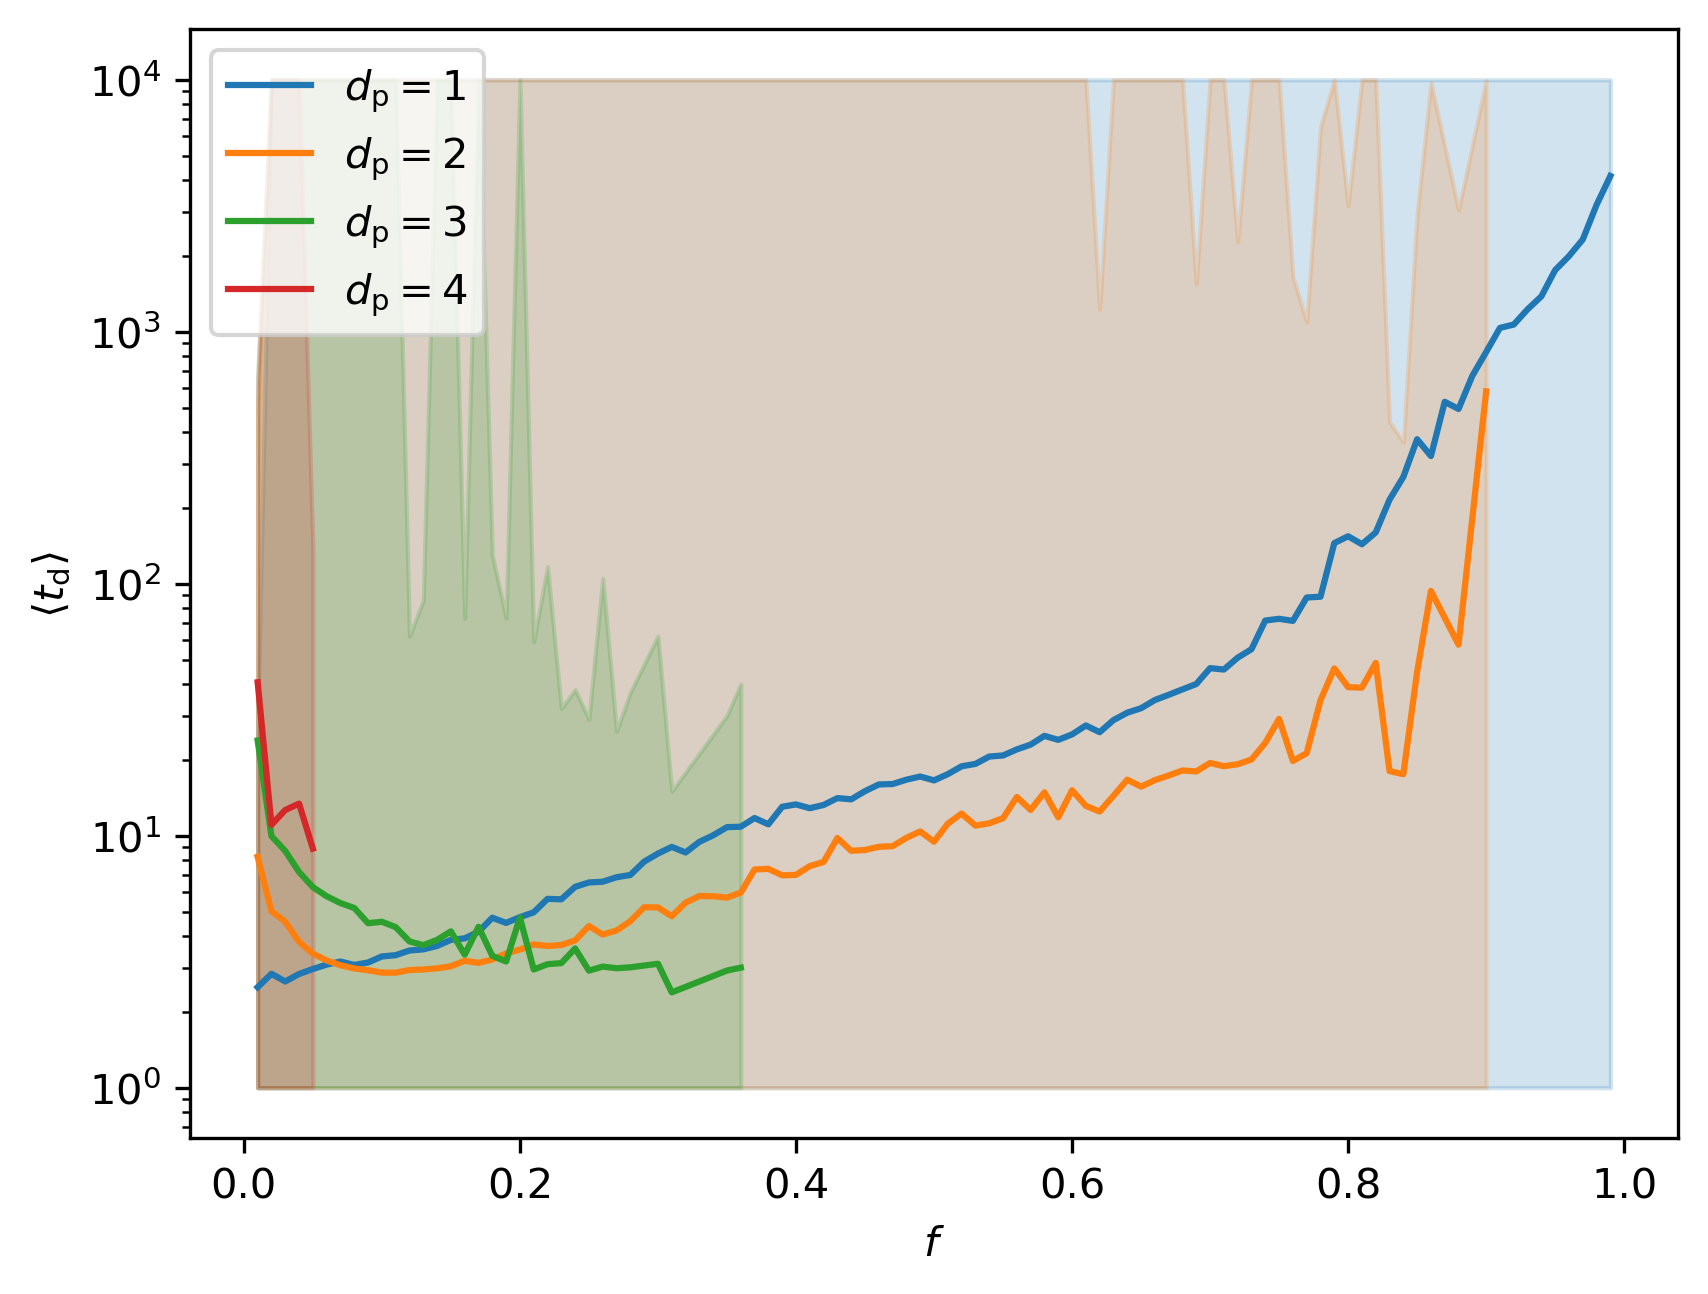

In [16]:
sns.lineplot(df_dist_1, x="partisans", y="d", errorbar= find_min_max, label="$d_{\\rm p} = 1$")
sns.lineplot(df_dist_2, x="partisans", y="d", errorbar= find_min_max, label="$d_{\\rm p} = 2$")
sns.lineplot(df_dist_3, x="partisans", y="d", errorbar= find_min_max, label="$d_{\\rm p} = 3$")
sns.lineplot(df_dist_4, x="partisans", y="d", errorbar= find_min_max, label="$d_{\\rm p} = 4$")
plt.legend()
plt.xlabel("$f$")
plt.ylabel("$\\langle t_{\\rm d} \\rangle$")
plt.yscale("log")
# plt.xscale("log")



(0.01, 0.1)

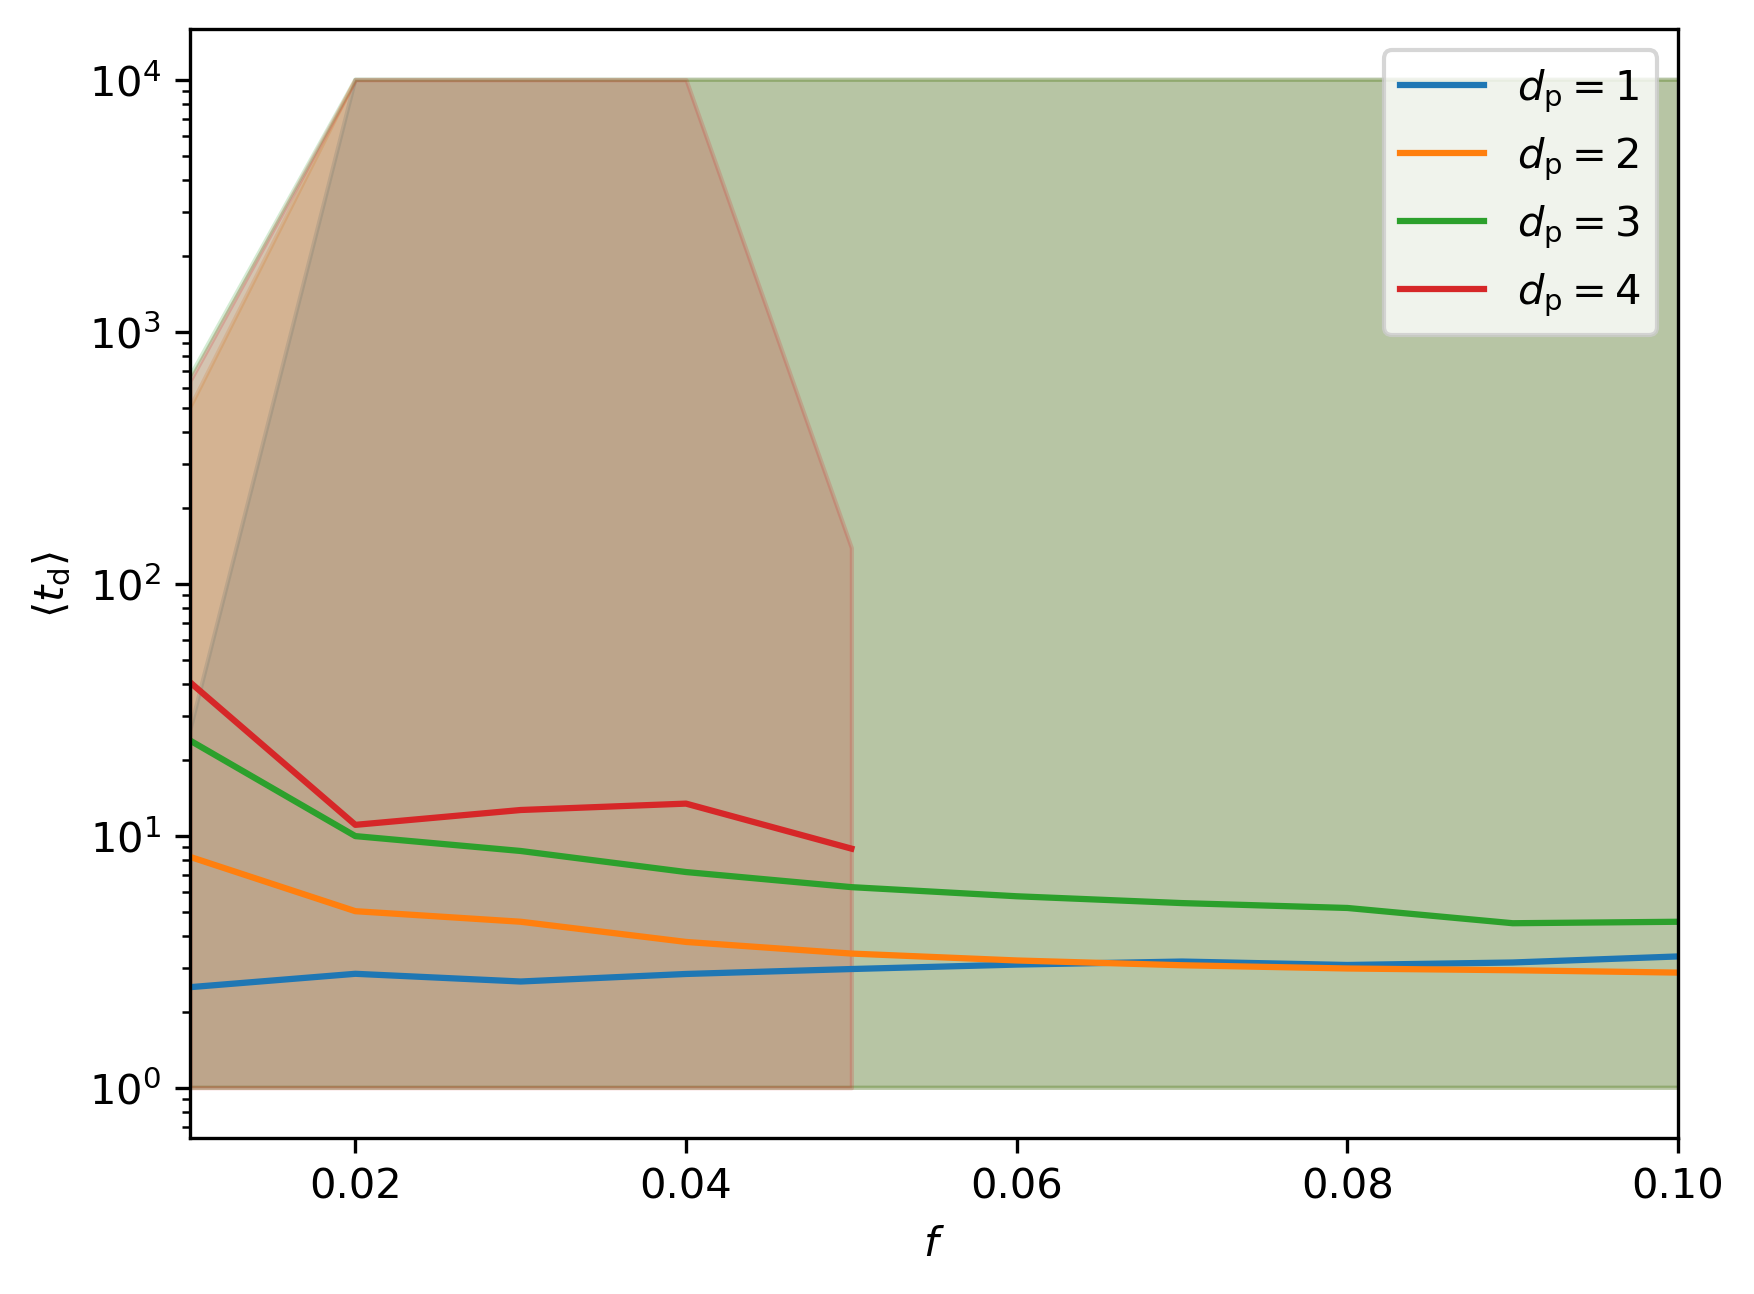

In [17]:
sns.lineplot(df_dist_1, x="partisans", y="d", errorbar= find_min_max, label="$d_{\\rm p} = 1$")
sns.lineplot(df_dist_2, x="partisans", y="d", errorbar= find_min_max, label="$d_{\\rm p} = 2$")
sns.lineplot(df_dist_3, x="partisans", y="d", errorbar= find_min_max, label="$d_{\\rm p} = 3$")
sns.lineplot(df_dist_4, x="partisans", y="d", errorbar= find_min_max, label="$d_{\\rm p} = 4$")
plt.legend()
plt.xlabel("$f$")
plt.ylabel("$\\langle t_{\\rm d} \\rangle$")
plt.yscale("log")
# plt.xscale("log")

plt.xlim(0.01, 0.1)

# m = 20

In [44]:
# import json
# Dwell = namedtuple("Dwell", ["n", "mean", "stdev"])
# # results_by_partisan[0.01] = [ aggdwells dist 0,  aggdwells dist 1, ... ]


# with open("output/bigexperiment-2023_02_25-20_46_34.log", 'r') as f:
#     max_distances = max(len(json.loads(line)['d']) for line in f)
#     results_by_partisan = defaultdict(lambda: [[] for x in range(max_distances)])

# rows = []
# with open("output/bigexperiment-2023_02_25-20_46_34.log", 'r') as f:
#     for line in f:
#         d = json.loads(line)

#         for dist, (n, mean, stdev) in enumerate(d['d']):
#             rows.append(dict(partisans= d['p'], dist= dist, n= n, mean= mean, stdev= stdev))
#             results_by_partisan[d['p']][dist].append(Dwell(n, mean, stdev))

# df = pd.DataFrame(rows)

In [23]:
import json
Dwell = namedtuple("Dwell", ["n", "d"])
# results_by_partisan[0.01] = [ aggdwells dist 0,  aggdwells dist 1, ... ]


with open("output/bigexperiment-2023_03_25-15_49_28.log", 'r') as f:
    max_distances = max(len(json.loads(line)['d']) for line in f)
    results_by_partisan = defaultdict(lambda: [[] for x in range(max_distances)])

rows = []
with open("output/bigexperiment-2023_03_25-15_49_28.log", 'r') as f:
    for line in f:
        data = json.loads(line)
        for dist, (n, d) in enumerate(data['d']):
            # n: number of agents with distance d
            for dwell in d:
                rows.append(dict(partisans= data['p'], dist= dist, n= n, d= dwell))

        #     rows.append(dict(partisans= data['p'], dist= dist, n= n, d=d))
        #     results_by_partisan[data['p']][dist].append(Dwell(n, d))

df = pd.DataFrame(rows)

In [24]:
df.groupby('partisans')

In [25]:
df_dist_1 = df[df.dist == 1]
df_dist_2 = df[df.dist == 2]
df_dist_3 = df[df.dist == 3]
df_dist_4 = df[df.dist == 4]

(0.0, 0.1)

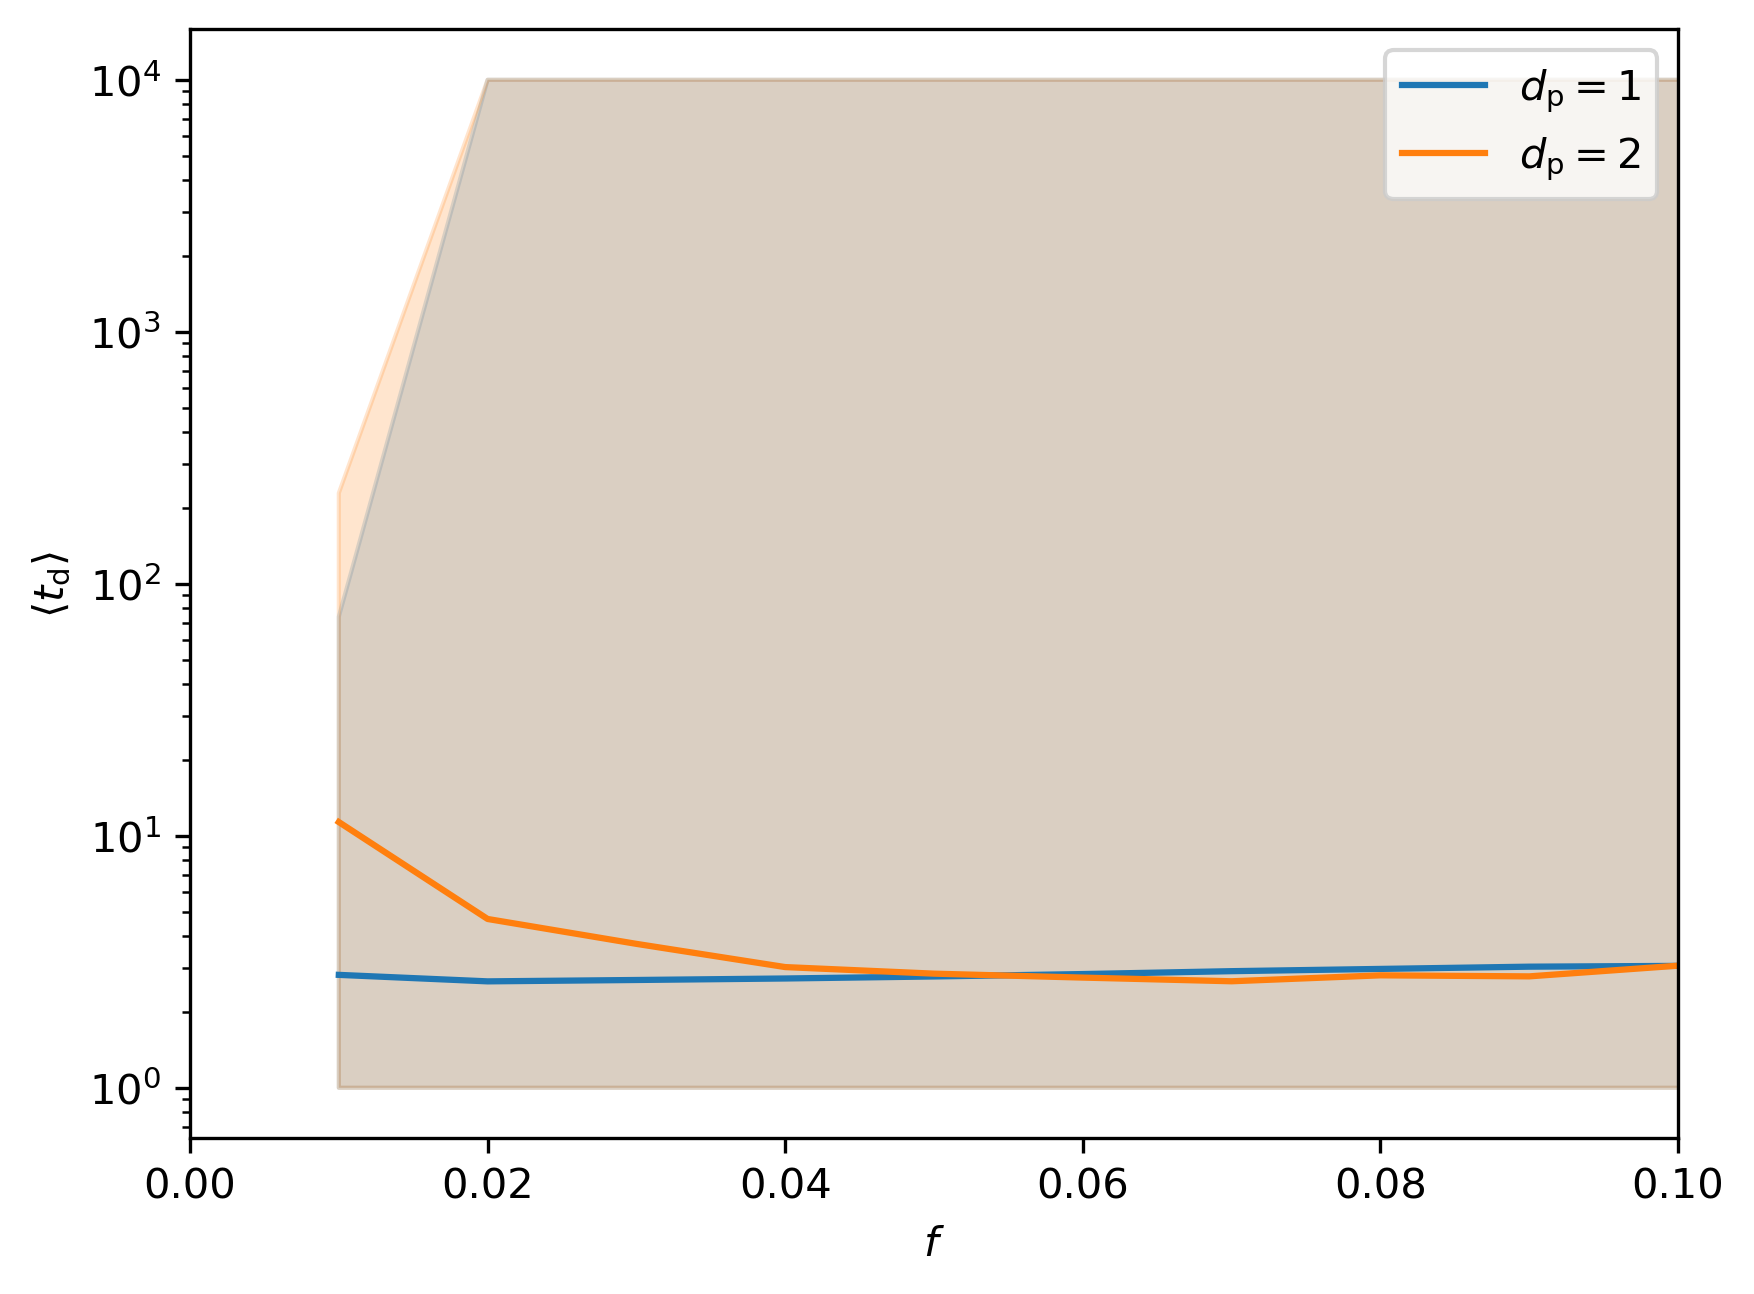

In [28]:
sns.lineplot(df_dist_1, x="partisans", y="d", errorbar= find_min_max, label="$d_{\\rm p} = 1$")
sns.lineplot(df_dist_2, x="partisans", y="d", errorbar= find_min_max, label="$d_{\\rm p} = 2$")
sns.lineplot(df_dist_3, x="partisans", y="d", errorbar= find_min_max, label="$d_{\\rm p} = 3$")
sns.lineplot(df_dist_4, x="partisans", y="d", errorbar= find_min_max, label="$d_{\\rm p} = 4$")
plt.legend()
plt.xlabel("$f$")
plt.ylabel("$\\langle t_{\\rm d} \\rangle$")
plt.yscale("log")
# plt.xscale("log")

plt.xlim(0,0.1)

In [ ]:
df["dist"].value_counts()


0    99000
1    99000
2     9820
Name: dist, dtype: int64

### Dwell Belief

In [40]:
import scipy as sp
import matplotlib as mpl

mpl.rcParams["figure.dpi"] = 300

from src.simulation.sim import *
from src.analyse.analyse import *
import pandas as pd
import powerlaw as pl
import plotly.io as pio
from scipy.optimize import curve_fit
pio.renderers.default = 'notebook_connected'
import numpy as np
import matplotlib.pyplot as plt
from collections import namedtuple, defaultdict
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib as mpl
mpl.rcParams["figure.dpi"] = 300


Result = namedtuple('Result', ['partisans', "sims"])
Sim = namedtuple("Sim", ["distance", "dwell_time", "mean_belief"])

SyntaxError: invalid syntax (715609008.py, line 26)

In [41]:
rows = []
with open("output/bigexperiment-2023_03_30-22_29_53.log", 'r') as f:
    for line in f:
        data = json.loads(line)
        for dist, (n, d) in enumerate(data['d']):
            for (dwell, bias) in d:
                rows.append(dict(partisans= data['p'], dist= dist, n= n, d= dwell, b=bias))

In [42]:
df_f003 = pd.DataFrame(rows)

In [43]:
df_f003

,partisans,dist,n,d,b
0,0.02,0,1,10000,0.300000
1,0.02,1,3,1,0.584310
2,0.02,1,3,3,0.586119
3,0.02,1,3,1,0.585182
4,0.02,1,3,2,0.586615
...,...,...,...,...,...
8921752,0.90,1,11,1,0.307461
8921753,0.90,1,11,9979,0.300000
8921754,0.90,1,11,2,0.309810
8921755,0.90,1,11,9979,0.300000


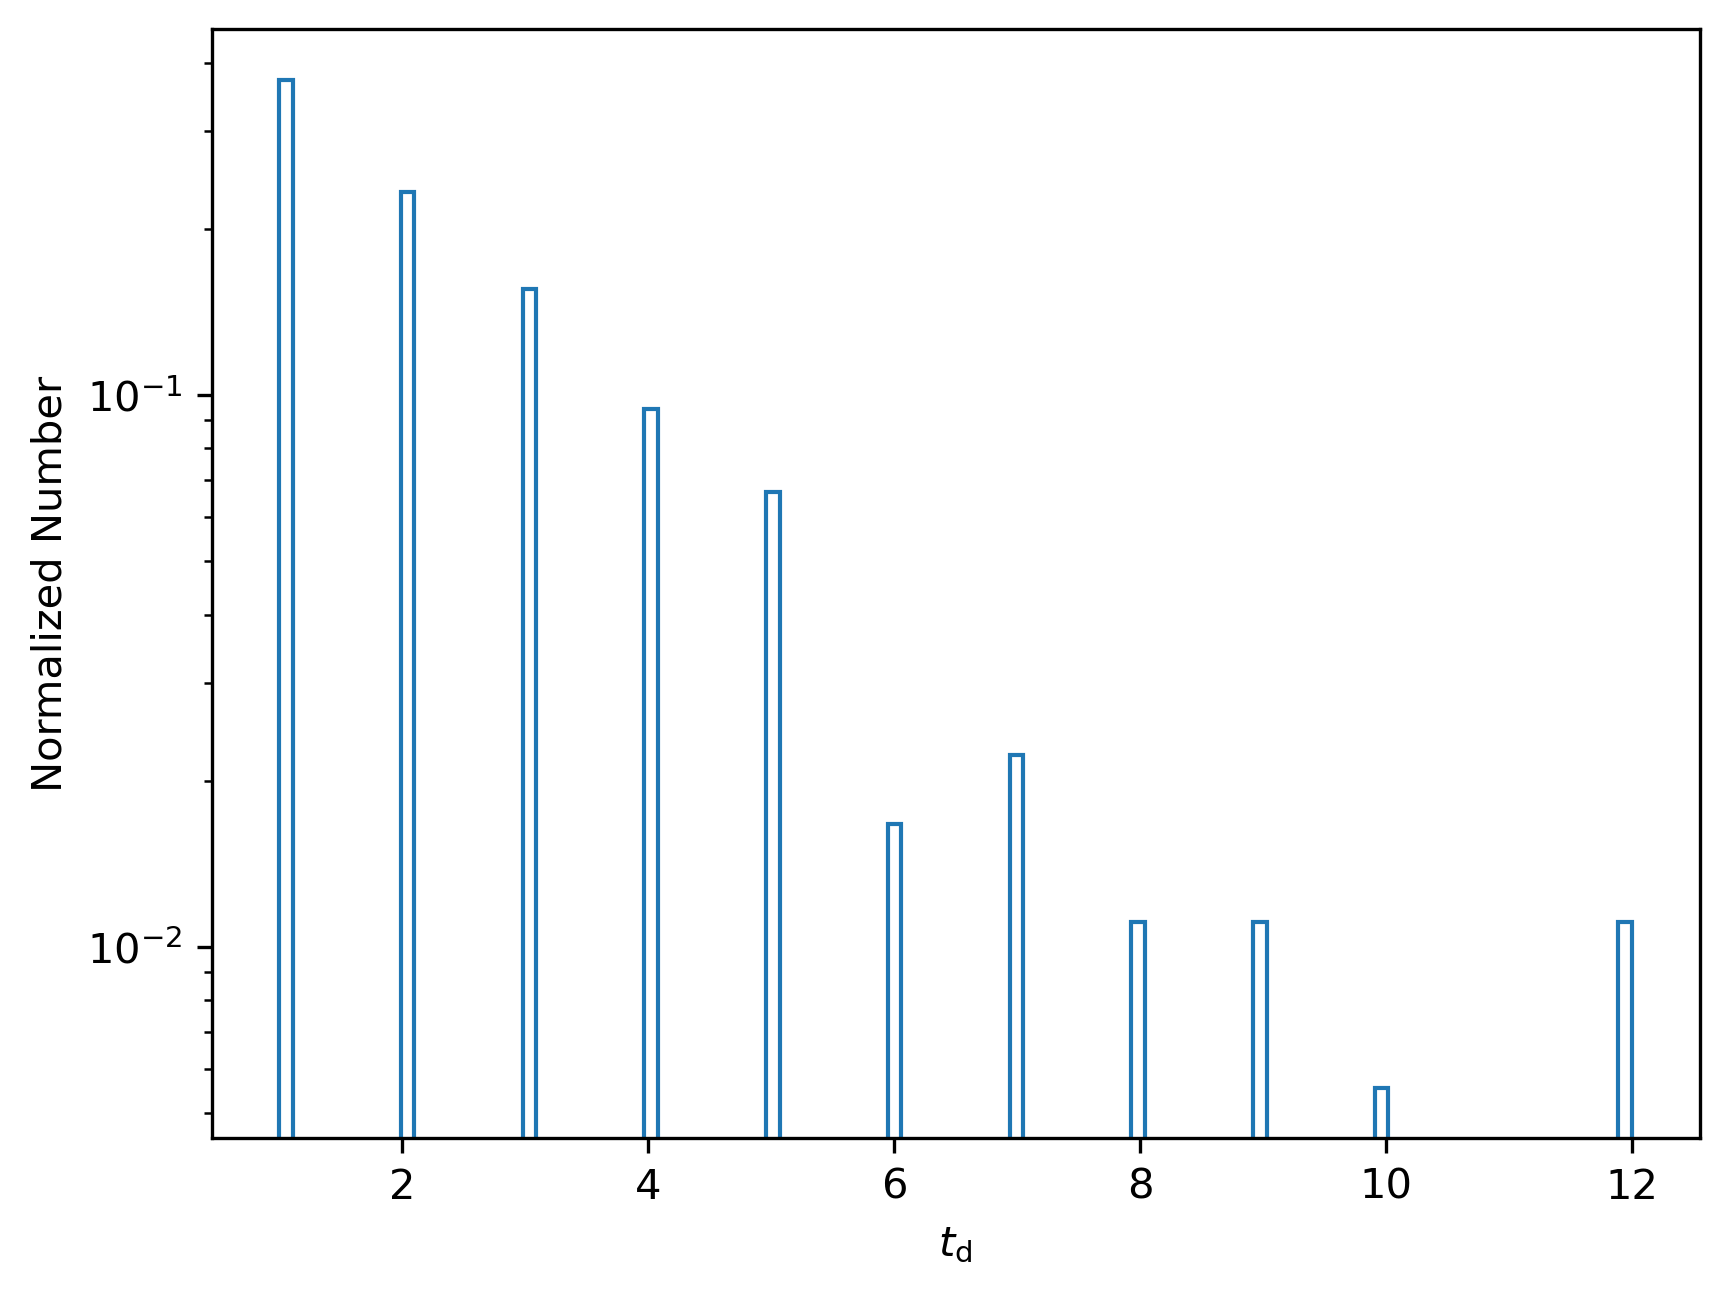

In [39]:
res_BA_f002[0].plot_dwell_time(bins = 100)